In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
passenger_2020=pd.read_csv('tridelta_timeseries_2020.csv')  
passenger_2019=pd.read_csv('tridelta_timeseries_2019.csv')
stops=pd.read_csv('processed_data/Tridelta/tridelta_stops.csv')
pd.to_datetime(passenger_2019['Date'], infer_datetime_format=True)  
pd.to_datetime(passenger_2020['Date'], infer_datetime_format=True)  
passenger_2020['inputDates'] = pd.to_datetime(passenger_2020['Date'])
passenger_2019['inputDates'] = pd.to_datetime(passenger_2019['Date'])
passenger_2020['dayOfWeek'] = passenger_2020['inputDates'].dt.day_name()
passenger_2019['dayOfWeek'] = passenger_2019['inputDates'].dt.day_name()
passenger_2020['Day']=np.where((passenger_2020['dayOfWeek']=='Saturday')|(passenger_2020['dayOfWeek']=='Sunday')|(passenger_2020['dayOfWeek']=='Friday'), 'weekend', 'weekday')
passenger_2019['Day']=np.where((passenger_2019['dayOfWeek']=='Saturday')|(passenger_2019['dayOfWeek']=='Sunday')|(passenger_2019['dayOfWeek']=='Friday'), 'weekend', 'weekday')

passenger_2020['Week_Number'] = passenger_2020['inputDates'].dt.strftime('%U')
passenger_2019['Week_Number'] = passenger_2019['inputDates'].dt.strftime('%U')


In [3]:
passenger_2020_weekday=passenger_2020[passenger_2020['Day']=='weekday']
passenger_2019_weekday=passenger_2019[passenger_2019['Day']=='weekday']

passenger_2020_weekend=passenger_2020[passenger_2020['Day']=='weekend']
passenger_2019_weekend=passenger_2019[passenger_2019['Day']=='weekend']

In [4]:
passenger_2020_weekday_merged=passenger_2020_weekday.merge(stops,left_on='Stop ID',right_on='stop_id')
passenger_2019_weekday_merged=passenger_2019_weekday.merge(stops,left_on='Stop ID',right_on='stop_id')

passenger_2020_weekend_merged=passenger_2020_weekend.merge(stops,left_on='Stop ID',right_on='stop_id')
passenger_2019_weekend_merged=passenger_2019_weekend.merge(stops,left_on='Stop ID',right_on='stop_id')

## Max activity 2019 & 2020

In [5]:
passenger_2020_weekday_grouped=passenger_2020_weekday_merged.groupby(['TRACTCE']).sum().reset_index()
passenger_2019_weekday_grouped=passenger_2019_weekday_merged.groupby(['TRACTCE']).sum().reset_index()
passenger_2020_weekday_grouped['max_on_off']=passenger_2020_weekday_grouped[['Passenger on','Passenger off']].max(axis=1)
passenger_2019_weekday_grouped['max_on_off']=passenger_2020_weekday_grouped[['Passenger on','Passenger off']].max(axis=1)
passenger_2020_weekday_grouped=passenger_2020_weekday_grouped[['TRACTCE','Passenger on','Passenger off','max_on_off']]
passenger_2019_weekday_grouped=passenger_2019_weekday_grouped[['TRACTCE','Passenger on','Passenger off','max_on_off']]

passenger_2020_weekend_grouped=passenger_2020_weekend_merged.groupby(['TRACTCE','Day']).sum().reset_index()
passenger_2019_weekend_grouped=passenger_2019_weekend_merged.groupby(['TRACTCE','Day']).sum().reset_index()
passenger_2020_weekend_grouped['max_on_off']=passenger_2020_weekend_grouped[['Passenger on','Passenger off']].max(axis=1)
passenger_2019_weekend_grouped['max_on_off']=passenger_2019_weekend_grouped[['Passenger on','Passenger off']].max(axis=1)
passenger_2020_weekend_grouped=passenger_2020_weekend_grouped[['TRACTCE','Passenger on','Passenger off','max_on_off']]
passenger_2019_weekend_grouped=passenger_2019_weekend_grouped[['TRACTCE','Passenger on','Passenger off','max_on_off']]

In [6]:
pass_on_week_2020=passenger_2020_weekday_grouped.sort_values(by='Passenger on',ascending=False)
tracts_pass_on_max_weekday_2020=pass_on_week_2020.iloc[:, 0]

pass_off_week_2020=passenger_2020_weekday_grouped.sort_values(by='Passenger off',ascending=False)
tracts_pass_off_max_weekday_2020=pass_off_week_2020.iloc[:, 0]

pass_on_off_week_2020=passenger_2020_weekday_grouped.sort_values(by='max_on_off',ascending=False)
tracts_pass_on_off_max_weekday_2020=pass_on_week_2020.iloc[:, 0]


pass_on_weekend_2020=passenger_2020_weekend_grouped.sort_values(by='Passenger on',ascending=False)
tracts_pass_on_max_weekend_2020=pass_on_weekend_2020.iloc[:, 0]

pass_off_weekend_2020=passenger_2020_weekend_grouped.sort_values(by='Passenger off',ascending=False)
tracts_pass_off_max_weekend_2020=pass_off_weekend_2020.iloc[:, 0]

pass_on_off_weekend_2020=passenger_2020_weekend_grouped.sort_values(by='max_on_off',ascending=False)
tracts_pass_on_off_max_weekend_2020=pass_on_off_weekend_2020.iloc[:, 0]



pass_on_week_2019=passenger_2019_weekday_grouped.sort_values(by='Passenger on',ascending=False)
tracts_pass_on_max_weekday_2019=pass_on_week_2019.iloc[:, 0]

pass_off_week_2019=passenger_2019_weekday_grouped.sort_values(by='Passenger off',ascending=False)
tracts_pass_off_max_weekday_2019=pass_off_week_2019.iloc[:, 0]

pass_on_off_week_2019=passenger_2019_weekday_grouped.sort_values(by='max_on_off',ascending=False)
tracts_pass_on_off_max_weekday_2019=pass_on_week_2019.iloc[:, 0]


pass_on_weekend_2019=passenger_2019_weekend_grouped.sort_values(by='Passenger on',ascending=False)
tracts_pass_on_max_weekend_2019=pass_on_weekend_2019.iloc[:, 0]

pass_off_weekend_2019=passenger_2019_weekend_grouped.sort_values(by='Passenger off',ascending=False)
tracts_pass_off_max_weekend_2019=pass_off_weekend_2019.iloc[:, 0]

pass_on_off_weekend_2019=passenger_2019_weekend_grouped.sort_values(by='max_on_off',ascending=False)
tracts_pass_on_off_max_weekend_2019=pass_on_off_weekend_2019.iloc[:, 0]

## Activity change overtime 

In [7]:
tracts_pass_on_max_weekday_2019_2020=pd.concat([tracts_pass_on_max_weekday_2020,tracts_pass_on_max_weekday_2019]).drop_duplicates().reset_index(drop=True)
tracts_pass_off_max_weekday_2019_2020=pd.concat([tracts_pass_off_max_weekday_2020,tracts_pass_off_max_weekday_2019]).drop_duplicates().reset_index(drop=True)
tracts_pass_on_off_max_weekday_2019_2020=pd.concat([tracts_pass_on_off_max_weekday_2020,tracts_pass_on_off_max_weekday_2019]).drop_duplicates().reset_index(drop=True)

tracts_pass_on_max_weekend_2019_2020=pd.concat([tracts_pass_on_max_weekend_2020,tracts_pass_on_max_weekend_2019]).drop_duplicates().reset_index(drop=True)
tracts_pass_off_max_weekend_2019_2020=pd.concat([tracts_pass_off_max_weekend_2020,tracts_pass_off_max_weekend_2019]).drop_duplicates().reset_index(drop=True)
tracts_pass_on_off_max_weekend_2019_2020=pd.concat([tracts_pass_on_off_max_weekend_2020,tracts_pass_on_off_max_weekend_2019]).drop_duplicates().reset_index(drop=True)


In [8]:
passenger_2020_weekday_on_max=passenger_2020_weekday_merged[passenger_2020_weekday_merged['TRACTCE'].isin(tracts_pass_on_max_weekday_2019_2020)]
passenger_2019_weekday_on_max=passenger_2019_weekday_merged[passenger_2019_weekday_merged['TRACTCE'].isin(tracts_pass_on_max_weekday_2019_2020)]

passenger_2020_weekday_off_max=passenger_2020_weekday_merged[passenger_2020_weekday_merged['TRACTCE'].isin(tracts_pass_off_max_weekday_2019_2020)]
passenger_2019_weekday_off_max=passenger_2019_weekday_merged[passenger_2019_weekday_merged['TRACTCE'].isin(tracts_pass_off_max_weekday_2019_2020)]

passenger_2020_weekday_on_off_max=passenger_2020_weekday_merged[passenger_2020_weekday_merged['TRACTCE'].isin(tracts_pass_on_off_max_weekday_2019_2020)]
passenger_2019_weekday_on_off_max=passenger_2019_weekday_merged[passenger_2019_weekday_merged['TRACTCE'].isin(tracts_pass_on_off_max_weekday_2019_2020)]


passenger_2020_weekend_on_max=passenger_2020_weekend_merged[passenger_2020_weekend_merged['TRACTCE'].isin(tracts_pass_on_max_weekend_2019_2020)]
passenger_2019_weekend_on_max=passenger_2019_weekend_merged[passenger_2019_weekend_merged['TRACTCE'].isin(tracts_pass_on_max_weekend_2019_2020)]

passenger_2020_weekend_off_max=passenger_2020_weekend_merged[passenger_2020_weekend_merged['TRACTCE'].isin(tracts_pass_off_max_weekend_2019_2020)]
passenger_2019_weekend_off_max=passenger_2019_weekend_merged[passenger_2019_weekend_merged['TRACTCE'].isin(tracts_pass_off_max_weekend_2019_2020)]

passenger_2020_weekend_on_off_max=passenger_2020_weekend_merged[passenger_2020_weekend_merged['TRACTCE'].isin(tracts_pass_on_off_max_weekend_2019_2020)]
passenger_2019_weekend_on_off_max=passenger_2019_weekend_merged[passenger_2019_weekend_merged['TRACTCE'].isin(tracts_pass_on_off_max_weekend_2019_2020)]


In [9]:
passenger_2020_weekday_on_max_grouped=passenger_2020_weekday_on_max.groupby(['Week_Number']).sum().reset_index()
passenger_2019_weekday_on_max_grouped=passenger_2019_weekday_on_max.groupby(['Week_Number']).sum().reset_index()

passenger_2020_weekday_off_max_grouped=passenger_2020_weekday_off_max.groupby(['Week_Number']).sum().reset_index()
passenger_2019_weekday_off_max_grouped=passenger_2019_weekday_off_max.groupby(['Week_Number']).sum().reset_index()

passenger_2020_weekday_on_off_max_grouped=passenger_2020_weekday_on_off_max.groupby(['Week_Number']).sum().reset_index()
passenger_2019_weekday_on_off_max_grouped=passenger_2019_weekday_on_off_max.groupby(['Week_Number']).sum().reset_index()

passenger_2020_weekday_on_off_max_grouped['max_on_off']=passenger_2020_weekday_on_off_max_grouped[['Passenger on','Passenger off']].max(axis=1)
passenger_2019_weekday_on_off_max_grouped['max_on_off']=passenger_2019_weekday_on_off_max_grouped[['Passenger on','Passenger off']].max(axis=1)

passenger_2020_weekend_on_max_grouped=passenger_2020_weekend_on_max.groupby(['Week_Number']).sum().reset_index()
passenger_2019_weekend_on_max_grouped=passenger_2019_weekend_on_max.groupby(['Week_Number']).sum().reset_index()

passenger_2020_weekend_off_max_grouped=passenger_2020_weekend_off_max.groupby(['Week_Number']).sum().reset_index()
passenger_2019_weekend_off_max_grouped=passenger_2019_weekend_off_max.groupby(['Week_Number']).sum().reset_index()

passenger_2020_weekend_on_off_max_grouped=passenger_2020_weekend_on_off_max.groupby(['Week_Number']).sum().reset_index()
passenger_2019_weekend_on_off_max_grouped=passenger_2019_weekend_on_off_max.groupby(['Week_Number']).sum().reset_index()

passenger_2020_weekend_on_off_max_grouped['max_on_off']=passenger_2020_weekend_on_off_max_grouped[['Passenger on','Passenger off']].max(axis=1)
passenger_2019_weekend_on_off_max_grouped['max_on_off']=passenger_2019_weekend_on_off_max_grouped[['Passenger on','Passenger off']].max(axis=1)


In [10]:
passenger_2020_weekday_on_max_grouped=passenger_2020_weekday_on_max_grouped[['Passenger on','Week_Number']]
passenger_2020_weekday_off_max_grouped=passenger_2020_weekday_off_max_grouped[['Passenger off','Week_Number']]
passenger_2020_weekday_on_off_max_grouped=passenger_2020_weekday_on_off_max_grouped[['max_on_off','Week_Number']]

passenger_2019_weekday_on_max_grouped=passenger_2019_weekday_on_max_grouped[['Passenger on','Week_Number']]
passenger_2019_weekday_off_max_grouped=passenger_2019_weekday_off_max_grouped[['Passenger off','Week_Number']]
passenger_2019_weekday_on_off_max_grouped=passenger_2019_weekday_on_off_max_grouped[['max_on_off','Week_Number']]


passenger_2020_weekend_on_max_grouped=passenger_2020_weekend_on_max_grouped[['Passenger on','Week_Number']]
passenger_2020_weekend_off_max_grouped=passenger_2020_weekend_off_max_grouped[['Passenger off','Week_Number']]
passenger_2020_weekend_on_off_max_grouped=passenger_2020_weekend_on_off_max_grouped[['max_on_off','Week_Number']]

passenger_2019_weekend_on_max_grouped=passenger_2019_weekend_on_max_grouped[['Passenger on','Week_Number']]
passenger_2019_weekend_off_max_grouped=passenger_2019_weekend_off_max_grouped[['Passenger off','Week_Number']]
passenger_2019_weekend_on_off_max_grouped=passenger_2019_weekend_on_off_max_grouped[['max_on_off','Week_Number']]


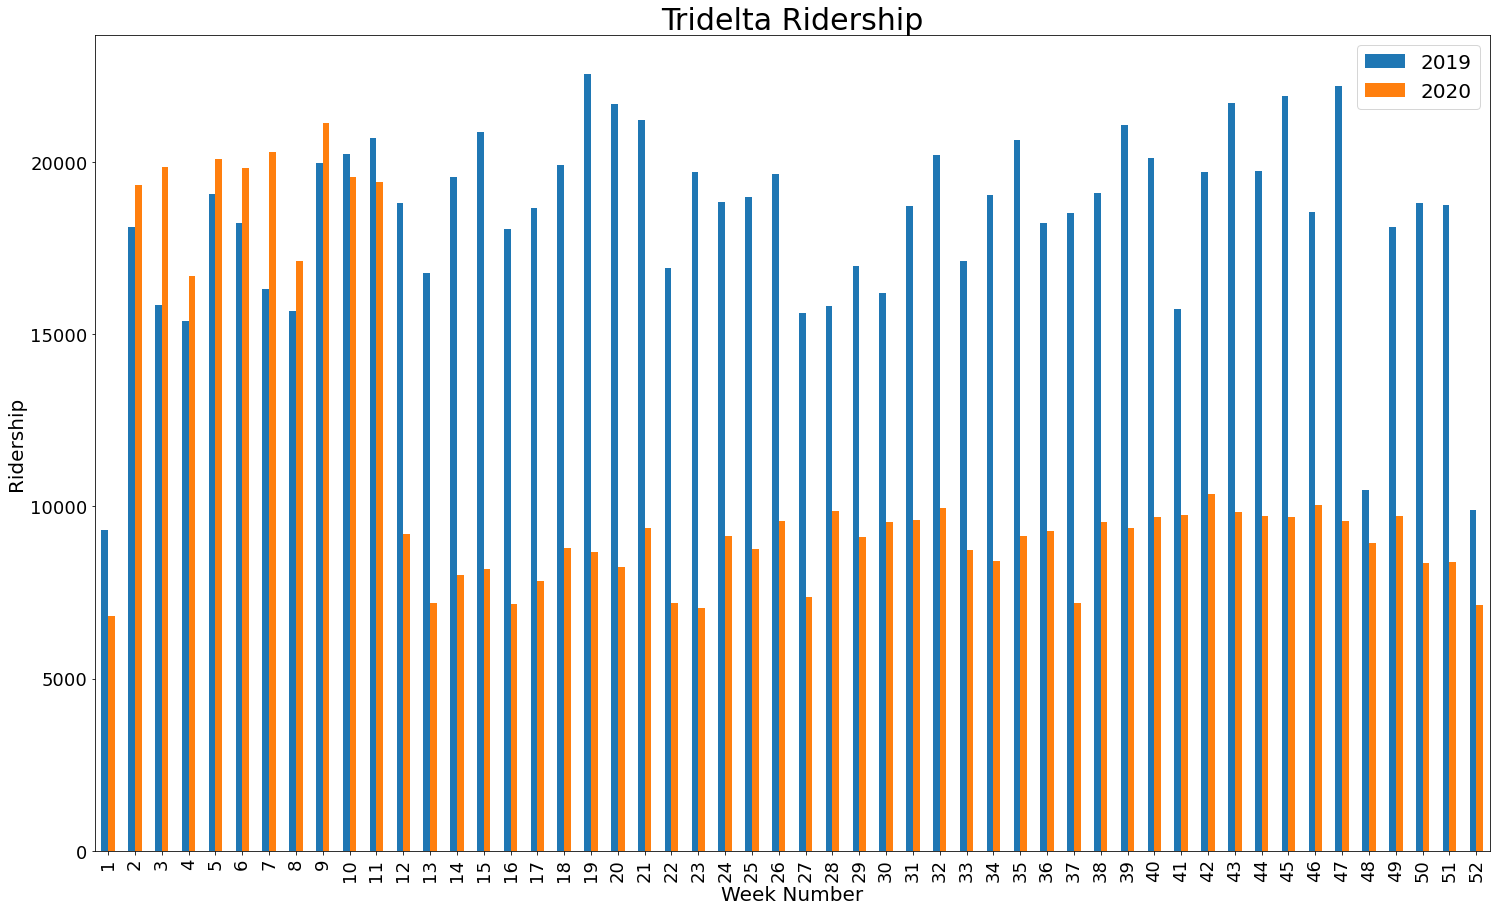

In [11]:
passengers_2020_total=passenger_2020_weekday_on_max_grouped
passengers_2020_total['Passenger on']=passengers_2020_total['Passenger on']+passenger_2020_weekend_on_max_grouped['Passenger on']

passengers_2019_total=passenger_2019_weekday_on_max_grouped
passengers_2019_total['Passenger on']=passengers_2019_total['Passenger on']+passenger_2019_weekend_on_max_grouped['Passenger on']
weeks=np.arange(1,53)
plotdata = pd.DataFrame({
    "2019":passengers_2019_total['Passenger on'].values[:-1],
    "2020":passengers_2020_total['Passenger on'].values[:-1],
    }, 
    index=weeks
)
plotdata.plot(kind="bar",figsize=(25,15), fontsize=18)
plt.xlabel("Week Number",fontsize=20)
plt.ylabel("Ridership",fontsize=20)
plt.title("Tridelta Ridership",fontsize=30)
plt.legend(["2019", "2020"], prop={"size":20})
plt.savefig("Tridelta_Ridership.png", dpi = 300, transparent=True, bbox_inches="tight")

# Utilization

In [13]:
trips_2019=pd.read_csv('tridelta_trips_timeseries_2019.csv')
trips_2020=pd.read_csv('tridelta_trips_timeseries_2019.csv')
pd.to_datetime(trips_2019['Date'], infer_datetime_format=True)  
pd.to_datetime(trips_2020['Date'], infer_datetime_format=True)  
trips_2019['inputDates'] = pd.to_datetime(trips_2019['Date'])
trips_2020['inputDates'] = pd.to_datetime(trips_2020['Date'])
trips_2019['dayOfWeek'] = trips_2019['inputDates'].dt.day_name()
trips_2020['dayOfWeek'] = trips_2020['inputDates'].dt.day_name()
trips_2019['Week_Number'] = trips_2019['inputDates'].dt.strftime('%U')
trips_2020['Week_Number'] = trips_2020['inputDates'].dt.strftime('%U')

In [14]:
trips_2019_grouped=trips_2019.groupby('Week_Number').sum().reset_index()
trips_2020_grouped=trips_2019.groupby('Week_Number').sum().reset_index()

In [15]:
utilization_2019=pd.DataFrame()
utilization_2020=pd.DataFrame()

utilization_2019['Utilization']=passengers_2019_total['Passenger on']/trips_2019_grouped['NumTrips']
utilization_2020['Utilization']=passengers_2020_total['Passenger on']/trips_2020_grouped['NumTrips']
utilization_2019['Week_Number']=passengers_2019_total['Week_Number']
utilization_2020['Week_Number']=passengers_2020_total['Week_Number']

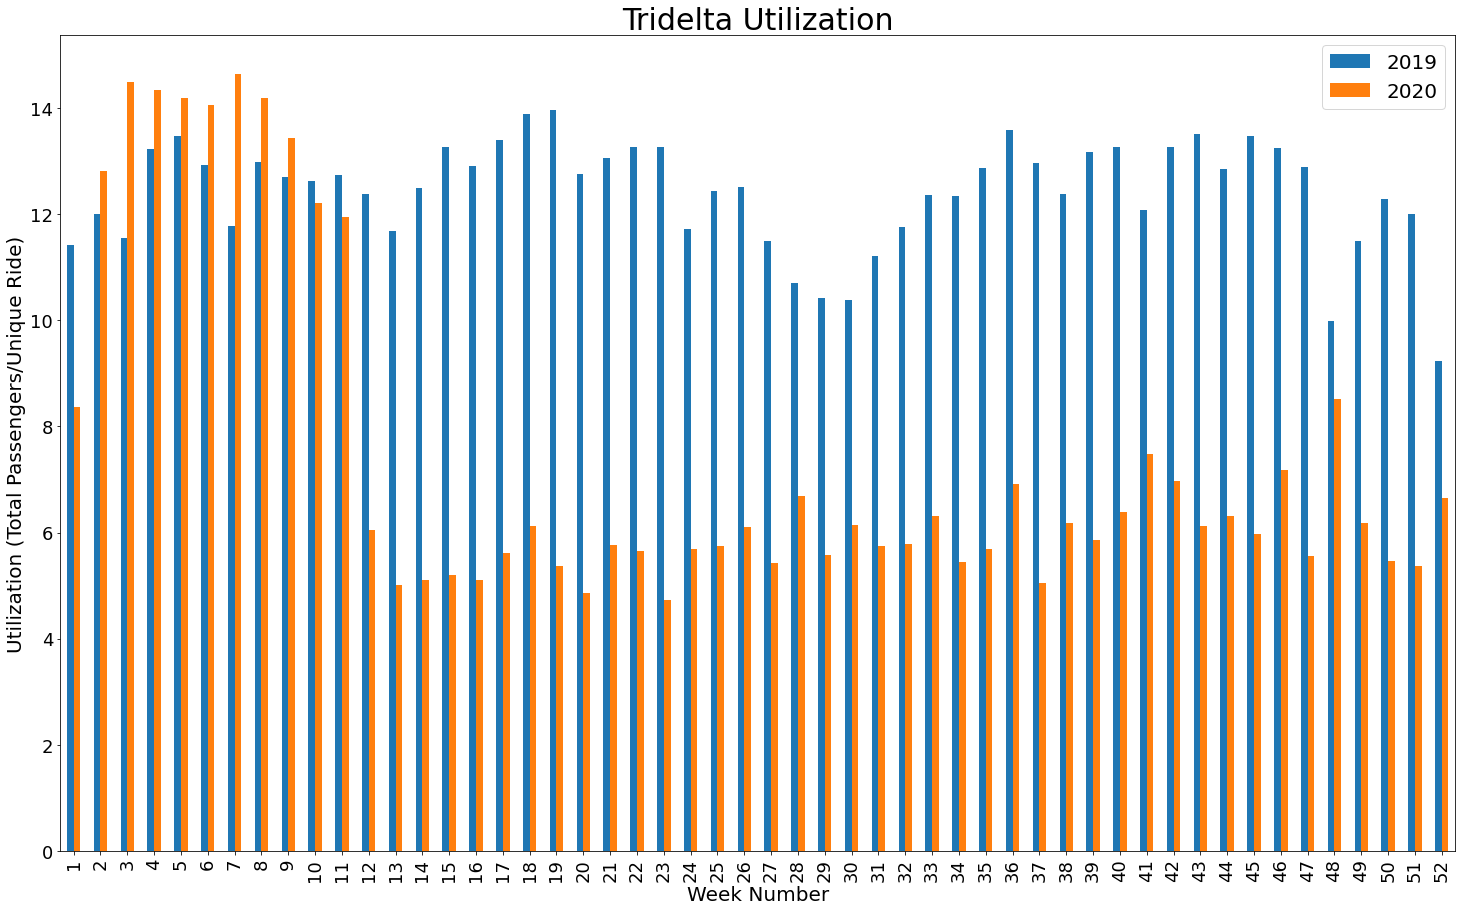

In [18]:
weeks=np.arange(1,53)
plotdata = pd.DataFrame({
    "2019":utilization_2019['Utilization'].values[:-1],
    "2020":utilization_2020['Utilization'].values[:-1],
    }, 
    index=weeks
)
plotdata.plot(kind="bar",figsize=(25,15), fontsize=18)
plt.xlabel("Week Number",fontsize=20)
plt.ylabel("Utilization (Total Passengers/Unique Ride)",fontsize=20)
plt.title("Tridelta Utilization",fontsize=30)
plt.legend(["2019", "2020"], prop={"size":20})
plt.savefig("Tridelta_Utilization.png", dpi = 300, transparent=True, bbox_inches="tight")